In [ ]:
#!pip install netCDF4
#!pip install cartopy
#!pip install requests

We will also need to import some libraries and modules:

In [1]:
# SET UP LIBRARIES AND MODULES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
import csv
import requests
import string
import math
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap
from netCDF4 import num2date

In [2]:
# Open CMIP7 climatology file and read in data

fname_c7c='ext_input4MIPs_aerosolProperties_CMIP_UOEXETER-CMIP-2-2-1_gnz_185001-202112-clim.nc'

nc = Dataset(fname_c7c, mode="r")

# Inspect global attributes
#print("Global attributes:")
#for attr in nc.ncattrs():
#    print(f"  {attr}: {getattr(nc, attr)}")

# Inspect dimensions
#print("\nDimensions:")
#for dim_name, dim in nc.dimensions.items():
#    print(f"  {dim_name}: size = {len(dim)}")

# Inspect variables
#print("\nVariables:")
#for var_name, var in nc.variables.items():
#    print(f"  {var_name}: dtype = {var.dtype}, dims = {var.dimensions}")

#print(nc.variables["time"].__dict__)
    
    
# READ IN DATA

heightsc=nc.variables["height"]
heightsec=nc.variables["height_bnds"]
wavesc=nc.variables["wavelength"]
latsc=nc.variables["lat"]
latsec=nc.variables["lat_bnds"]
timesc=nc.variables["time"]
timesc_units = nc.variables["time"].units   # "days since 1850-01-01"
timesc_cal   = nc.variables["time"].calendar  # "proleptic_gregorian"

print(heightsc[:])
print(heightsec[:])
print(wavesc[:])
print(latsc[:])
print(latsc.shape)
print(latsec.shape)
print(timesc.shape)
print(timesc[:])
print(timesc_units)
print(timesc_cal)

mywavec=7
print(wavesc[mywavec])

extc=nc.variables["ext"]
print(extc.shape)
ext550c=extc[:,:,:,mywavec]

print(np.nanmax(ext550c))
print(np.nanmin(ext550c))






[ 5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000. 15500. 16000. 16500. 17000. 17500. 18000. 18500. 19000. 19500.
 20000. 20500. 21000. 21500. 22000. 22500. 23000. 23500. 24000. 24500.
 25000. 25500. 26000. 26500. 27000. 27500. 28000. 28500. 29000. 29500.
 30000. 30500. 31000. 31500. 32000. 32500. 33000. 33500. 34000. 34500.
 35000. 35500. 36000. 36500. 37000. 37500. 38000. 38500. 39000. 39500.]
[[ 4750.  5250.]
 [ 5250.  5750.]
 [ 5750.  6250.]
 [ 6250.  6750.]
 [ 6750.  7250.]
 [ 7250.  7750.]
 [ 7750.  8250.]
 [ 8250.  8750.]
 [ 8750.  9250.]
 [ 9250.  9750.]
 [ 9750. 10250.]
 [10250. 10750.]
 [10750. 11250.]
 [11250. 11750.]
 [11750. 12250.]
 [12250. 12750.]
 [12750. 13250.]
 [13250. 13750.]
 [13750. 14250.]
 [14250. 14750.]
 [14750. 15250.]
 [15250. 15750.]
 [15750. 16250.]
 [16250. 16750.]
 [16750. 17250.]
 [17250. 17750.]
 [17750. 18250.]
 [18250. 18750.]
 [18750. 19250.]
 [19250. 

In [3]:
# Open CMIP7 file and read in data

fname_c7='ext_input4MIPs_aerosolProperties_CMIP_UOEXETER-CMIP-2-2-1_gnz_175001-202312.nc'

nc = Dataset(fname_c7, mode="r")

# Inspect global attributes
#print("Global attributes:")
#for attr in nc.ncattrs():
#    print(f"  {attr}: {getattr(nc, attr)}")

# Inspect dimensions
#print("\nDimensions:")
#for dim_name, dim in nc.dimensions.items():
#    print(f"  {dim_name}: size = {len(dim)}")

# Inspect variables
#print("\nVariables:")
#for var_name, var in nc.variables.items():
#    print(f"  {var_name}: dtype = {var.dtype}, dims = {var.dimensions}")

#print(nc.variables["time"].__dict__)
    
    
# READ IN DATA

heights=nc.variables["height"]
heightse=nc.variables["height_bnds"]
waves=nc.variables["wavelength"]
lats=nc.variables["lat"]
latse=nc.variables["lat_bnds"]
times=nc.variables["time"]
timese=nc.variables["time_bnds"]
timese_units = nc.variables["time"].units   # "days since 1850-01-01"
timese_cal   = nc.variables["time"].calendar  # "proleptic_gregorian"

#print(heights[:])
#print(heightse[:])
#print(waves[:])
#print(lats[:])
#print(lats.shape)
#print(latse.shape)
#print(timese.shape)
#print(times[:])
#print(timese[:])
#print(timese_units)
#print(timese_cal)

mywave=7
#print(waves[mywave])

ext=nc.variables["ext"]
ext550=ext[:,:,:,mywave]

print(np.nanmax(ext550))
print(np.nanmin(ext550))

    

0.00014655746987830604
1.6410072237460605e-14


In [4]:
# calendar

# Convert to Python datetime objects
dates = num2date(times, units=timese_units, calendar=timese_cal)

#print(dates)

years = np.array([d.year for d in dates])
months = np.array([d.month for d in dates])

yearsm=years+(months-1)/12.0

#print(years)
#print(months)


In [5]:
# create aod from ext

widths=heightse[:,1]-heightse[:,0]
#print(widths)

aod550=np.nansum( ext550 * widths[np.newaxis,np.newaxis,:] , axis=2)

#print(aod550.shape)
#print(aod550.max)
#print(aod550.min)


In [6]:
# create aod from ext (climatology)

widthsc=heightsec[:,1]-heightsec[:,0]
print(widthsc)

aod550c=np.nansum( ext550c * widthsc[np.newaxis,np.newaxis,:] , axis=2)

print(aod550c.shape)
print(np.max(aod550c))
print(np.min(aod550c))

#print(aod550c)


Nyear=2000
Syear=1000

#aod550cr=np.repeat(aod550c, repeats=Nyear, axis=0)
aod550cr=np.tile(aod550c, (Nyear, 1))

yearsmcr=Syear+np.arange(Nyear*12)/12.0

print(np.max(yearsmcr))
print(np.min(yearsmcr))

yearscr=np.repeat(np.arange(Syear, Syear + Nyear), 12)
monthscr = np.tile(np.arange(1, 13), Nyear)

print(yearscr)
print(monthscr)


[500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.]
(12, 36)
0.02806401298291145
0.008795501541181723
2999.916666666667
1000.0
[1000 1000 1000 ... 2999 2999 2999]
[ 1  2  3 ... 10 11 12]


In [ ]:
# Open CMIP6 file and read in data

fname_c6='CMIP_1850_2014_extinction_550nm_strat_only_v3.nc'

nc6 = Dataset(fname_c6, mode="r")

# Inspect global attributes
print("Global attributes:")
for attr in nc6.ncattrs():
    print(f"  {attr}: {getattr(nc6, attr)}")

# Inspect dimensions
print("\nDimensions:")
for dim_name, dim in nc6.dimensions.items():
    print(f"  {dim_name}: size = {len(dim)}")

# Inspect variables
print("\nVariables:")
for var_name, var in nc6.variables.items():
    print(f"  {var_name}: dtype = {var.dtype}, dims = {var.dimensions}")

print(nc6.variables["month"].__dict__)
    
print(nc6.variables["altitude"].__dict__)

print(nc6.variables["ext550"].__dict__)
    
# READ IN DATA

heights6=nc6.variables["altitude"]

lats6=nc6.variables["latitude"]
months6=nc6.variables["month"]
months6_units = nc6.variables["month"].units   # "days since 1850-01-01"
#months6_cal   = nc6.variables["month"].calendar  # "proleptic_gregorian"

#print(heights[:])
#print(heightse[:])
#print(waves[:])
#print(lats[:])
#print(lats.shape)
#print(latse.shape)
#print(timese.shape)
#print(times[:])
#print(timese[:])
#print(timese_units)
#print(timese_cal)

ext5506=nc6.variables["ext550"]

#print(ext550.max)
#print(ext550.min)
#print(months6[:])

yearsm6=(months6[:] - 1.0)/12.0+1850.0

#print(yearsm6)



# create aod from ext

#print(heights6[:])

widths6=(heights6[:]-np.concatenate( ( [4.5], heights6[:-1] ) ))
#print(widths6)

aod5506=np.nansum( ext5506 * widths6[np.newaxis,:,np.newaxis] , axis=1)

#print(aod550.shape)
#print(aod550.max)
#print(aod550.min)


print(lats6[:])

In [ ]:
# read in Paul AOD

data = np.loadtxt("eVolv2k_v3_-500_1900_mon.dat", dtype=float)

yearsv  = data[:, 0]
monthsv = data[:, 1]
aodm30m90v = data[:, 2]*1e-4
aodp00m30v = data[:, 3]*1e-4
aodp30p00v = data[:, 4]*1e-4
aodp90p30v = data[:, 5]*1e-4

yearsvm=yearsv+(monthsv-1)/12.0


In [ ]:
# make a plot of CMIP6 AOD

colors = ["white", "yellow", "red"]   # white → pale yellow → deep red
mycmap = LinearSegmentedColormap.from_list("white_yellow_red", colors)

y_edges6=np.concatenate( (lats6[:]-2.5,[90]) )
#print(y_edges6)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges6=np.concatenate( (yearsm6[:],[2015.0]) )
#print(x_edges6)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges6, y_edges6, np.log10(aod5506), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550_cmip6.png")
plt.show()

#print(aod5506[:])


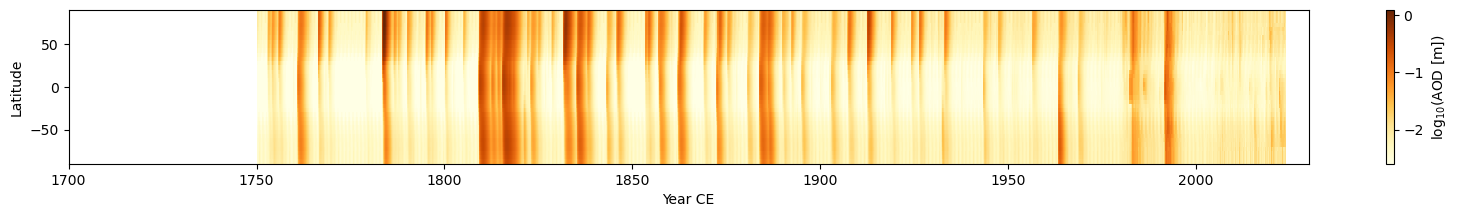

In [7]:
# make a plot of CMIP7 AOD


colors = ["white", "yellow", "red"]   # white → pale yellow → deep red
mycmap = LinearSegmentedColormap.from_list("white_yellow_red", colors)


y_edges=np.concatenate( (latse[:,0],[latse[-1,1]]) )
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (yearsm[:],[2024.0]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod550.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550_cmip7.png")
plt.show()

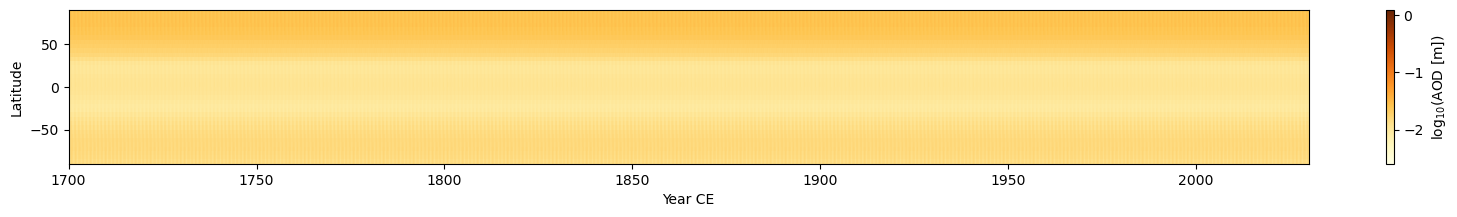

In [8]:
# make a plot of CMIP7 AOD (climatology)


colors = ["white", "yellow", "red"]   # white → pale yellow → deep red
mycmap = LinearSegmentedColormap.from_list("white_yellow_red", colors)


y_edges=np.concatenate( (latsec[:,0],[latsec[-1,1]]) )
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (yearsmcr[:],[Syear+Nyear]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod550cr.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550_cmip7_clim.png")
plt.show()

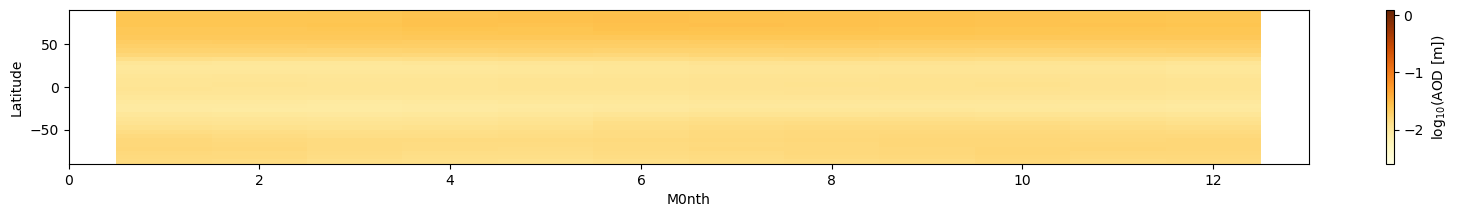

In [10]:
# make a plot of CMIP7 AOD (climatology) monthly


colors = ["white", "yellow", "red"]   # white → pale yellow → deep red
mycmap = LinearSegmentedColormap.from_list("white_yellow_red", colors)


y_edges=np.concatenate( (latsec[:,0],[latsec[-1,1]]) )
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (np.arange(12)+0.5,[12.5]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod550c.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(0,13)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("M0nth")
plt.ylabel("Latitude")
plt.savefig("aod550_cmip7_clim_month.png")
plt.show()

In [11]:
# calculate weights etc. and regrid to HadCM3

latsv=nc.variables["lat"][:]

pi=3.141579
mylate=y_edges*2*pi/360.0
#print(y_edges)
ny=len(lats)

weights=np.zeros((ny))
for y in range (ny):
    weights[y]=(np.sin(mylate[y+1])-np.sin(mylate[y]))

weights=weights*1/(2.0)
print(f"Should be 1: {np.sum(weights)}")

mask_90_30    = (latsv >=  30) & (latsv <=  90)
mask_30_0     = (latsv >=   0) & (latsv <   30)
mask_0_neg30  = (latsv >= -30) & (latsv <    0)
mask_neg30_90 = (latsv >= -90) & (latsv <  -30)
w_90_30    = np.zeros_like(weights)
w_30_0     = np.zeros_like(weights)
w_0_neg30  = np.zeros_like(weights)
w_neg30_90 = np.zeros_like(weights)

w_90_30[mask_90_30]       = weights[mask_90_30]
w_30_0[mask_30_0]         = weights[mask_30_0]
w_0_neg30[mask_0_neg30]   = weights[mask_0_neg30]
w_neg30_90[mask_neg30_90] = weights[mask_neg30_90]

if np.sum(w_90_30) > 0:
    w_90_30 /= np.sum(w_90_30)
if np.sum(w_30_0) > 0:
    w_30_0 /= np.sum(w_30_0)
if np.sum(w_0_neg30) > 0:
    w_0_neg30 /= np.sum(w_0_neg30)
if np.sum(w_neg30_90) > 0:
    w_neg30_90 /= np.sum(w_neg30_90)

print(np.sum(w_90_30))
print(np.sum(w_30_0))
print(np.sum(w_0_neg30))
print(np.sum(w_neg30_90))
    
    
    
    



Should be 1: 0.9999999999766975
1.0000000000000002
1.0
1.0
1.0


In [12]:

# CMIP7 regrid
aodall=np.nansum(aod550 * weights[np.newaxis,:] , axis=1)
aodp90p30=np.nansum(aod550 * w_90_30[np.newaxis,:] , axis=1)
aodp30p00=np.nansum(aod550 * w_30_0[np.newaxis,:] , axis=1)
aodp00m30=np.nansum(aod550 * w_0_neg30[np.newaxis,:] , axis=1)
aodm30m90=np.nansum(aod550 * w_neg30_90[np.newaxis,:] , axis=1)
# 0.25 because fraction of Earth between 30N and 90N = (sin(90)-sin(30))/2.0=(1-0.5)/2=0.25.  Similarly for Eq to 30N.
aodall2=0.25*(aodp90p30 + aodp30p00 + aodp00m30 + aodm30m90)



In [13]:
# CMIP7 climatology regrid
aodallcr=np.nansum(aod550cr * weights[np.newaxis,:] , axis=1)
aodp90p30cr=np.nansum(aod550cr * w_90_30[np.newaxis,:] , axis=1)
aodp30p00cr=np.nansum(aod550cr * w_30_0[np.newaxis,:] , axis=1)
aodp00m30cr=np.nansum(aod550cr * w_0_neg30[np.newaxis,:] , axis=1)
aodm30m90cr=np.nansum(aod550cr * w_neg30_90[np.newaxis,:] , axis=1)

In [14]:
# CMIP7 climatology regrid (monthly)
aodallc=np.nansum(aod550c * weights[np.newaxis,:] , axis=1)
aodp90p30c=np.nansum(aod550c * w_90_30[np.newaxis,:] , axis=1)
aodp30p00c=np.nansum(aod550c * w_30_0[np.newaxis,:] , axis=1)
aodp00m30c=np.nansum(aod550c * w_0_neg30[np.newaxis,:] , axis=1)
aodm30m90c=np.nansum(aod550c * w_neg30_90[np.newaxis,:] , axis=1)

In [ ]:
# make line graphs of the 4 latitudinal bands

plt.figure(figsize=(20, 6))   # long and thin
plt.plot(yearsm,aodall)        # simple line plot
plt.xlim(1700,2030)
plt.ylim(0,1.0)
plt.xlabel("Time")
plt.ylabel("AOD")
plt.show()

plt.figure(figsize=(20, 6))   # long and thin
plt.plot(yearsm,aodp90p30)        # simple line plot
plt.plot(yearsvm,aodp90p30v,linestyle='--',color='lightgray')        # simple line plot
plt.xlim(1700,2030)
plt.ylim(0,1.0)
plt.xlabel("Time")
plt.ylabel("AOD +90 to +30")
plt.show()

plt.figure(figsize=(20, 6))   # long and thin
plt.plot(yearsm,aodp30p00)        # simple line plot
plt.plot(yearsvm,aodp30p00v,linestyle='--',color='lightgray')        # simple line plot
plt.xlim(1700,2030)
plt.ylim(0,1.0)
plt.xlabel("Time")
plt.ylabel("AOD +30 to EQ")
plt.show()

plt.figure(figsize=(20, 6))   # long and thin
plt.plot(yearsm,aodp00m30)        # simple line plot
plt.plot(yearsvm,aodp00m30v,linestyle='--',color='lightgray')        # simple line plot
plt.xlim(1700,2030)
plt.ylim(0,1.0)
plt.xlabel("Time")
plt.ylabel("AOD EQ to -30")
plt.show()

plt.figure(figsize=(20, 6))   # long and thin
plt.plot(yearsm,aodm30m90)        # simple line plot
plt.plot(yearsvm,aodm30m90v,linestyle='--',color='lightgray')        # simple line plot
plt.xlim(1700,2030)
plt.ylim(0,1.0)
plt.xlabel("Time")
plt.ylabel("AOD -30 to -90")
plt.show()

# Checks:

#plt.figure(figsize=(20, 6 ))   # long and thin
#plt.plot(yearsm,aodall2)        # simple line plot
#plt.xlim(1700,2100)
#plt.ylim(0,1.0)
#plt.xlabel("Time")
#plt.ylabel("AOD SUM")
#plt.show()

#plt.figure(figsize=(20, 6 ))   # long and thin
#plt.plot(yearsm,aodall-aodall2)        # simple line plot
#plt.xlim(1700,2100)
#plt.ylim(0,1.0)
#plt.xlabel("Time")
#plt.ylabel("AOD RESID")
#plt.show()


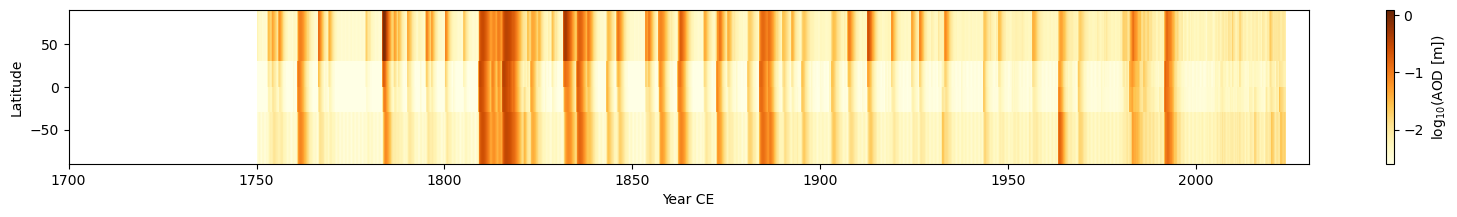

In [15]:
# plot the CMIP7 AOD in HadCM3 bands

aod_stacked = np.column_stack([aodm30m90, aodp00m30, aodp30p00, aodp90p30])

y_edges=[-90,-30,0,30,90]
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (yearsm[:],[2024.0]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod_stacked.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550_cmip7_hadcm3.png")
plt.show()

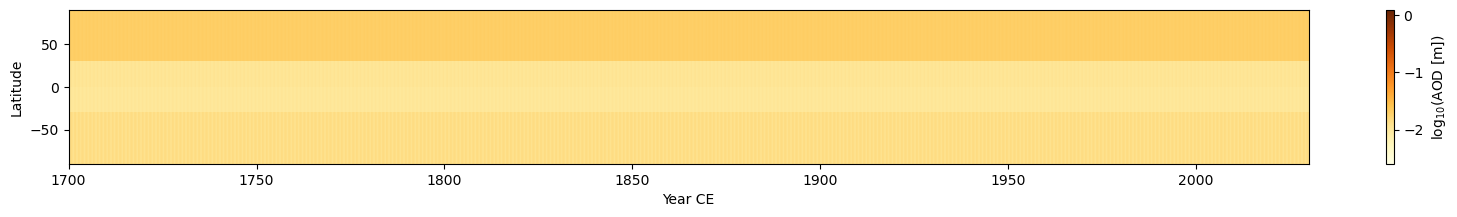

In [16]:
# plot the CMIP7 AOD in HadCM3 bands (climatology)

aod_stacked = np.column_stack([aodm30m90cr, aodp00m30cr, aodp30p00cr, aodp90p30cr])

y_edges=[-90,-30,0,30,90]
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (yearsmcr[:],[Syear+Nyear]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod_stacked.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550cr_cmip7_hadcm3.png")
plt.show()

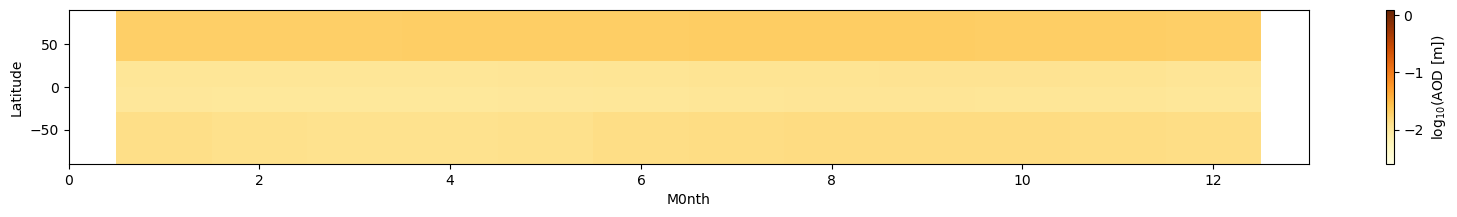

In [17]:
# plot the CMIP7 AOD in HadCM3 bands (climatology) (monthly)

aod_stacked = np.column_stack([aodm30m90c, aodp00m30c, aodp30p00c, aodp90p30c])

colors = ["white", "yellow", "red"]   # white → pale yellow → deep red
mycmap = LinearSegmentedColormap.from_list("white_yellow_red", colors)

y_edges=[-90,-30,0,30,90]
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (np.arange(12)+0.5,[12.5]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod_stacked.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(0,13)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("M0nth")
plt.ylabel("Latitude")
plt.savefig("aod550_cmip7_clim_month.png")
plt.show()

In [ ]:
# plot the Valdes AOD in HadCM3 bands

aod_stacked = np.column_stack([aodm30m90v, aodp00m30v, aodp30p00v, aodp90p30v])

y_edges=[-90,-30,0,30,90]
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edges=np.concatenate( (yearsvm[:],[1901.0]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edges, y_edges, np.log10(aod_stacked.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550_valdes_hadcm3.png")
plt.show()

In [18]:
# write out CMIP7 AOD in HadCM3 bands :

mydata = np.column_stack([
    years,
    months,
    np.clip(aodm30m90*1e4,1, None),
    np.clip(aodp00m30*1e4,1, None),
    np.clip(aodp30p00*1e4,1, None),
    np.clip(aodp90p30*1e4,1, None)
])

np.savetxt(
    "CMIP7_aod_550_1750_2023.dat",
    mydata,
    fmt="%8d %7d %7d %7d %7d %7d"
)



In [ ]:
# write out CMIP7 AOD in HadCM3 bands (climatology) (monthly):

mydata = np.column_stack([
    np.full(12, 1850),
    np.arange(1,13),
    np.clip(aodm30m90c*1e4,1, None),
    np.clip(aodp00m30c*1e4,1, None),
    np.clip(aodp30p00c*1e4,1, None),
    np.clip(aodp90p30c*1e4,1, None)
])

np.savetxt(
    "CMIP7_aod_550_clim.dat",
    mydata,
    fmt="%8d %7d %7d %7d %7d %7d"
)


In [ ]:
# write out CMIP7 AOD in HadCM3 bands (climatology):

mydata = np.column_stack([
    yearscr,
    monthscr,
    np.clip(aodm30m90cr*1e4,1, None),
    np.clip(aodp00m30cr*1e4,1, None),
    np.clip(aodp30p00cr*1e4,1, None),
    np.clip(aodp90p30cr*1e4,1, None)
])

np.savetxt(
    "CMIP7_aod_550_clim_1600_1949.dat",
    mydata,
    fmt="%8d %7d %7d %7d %7d %7d"
)

In [ ]:
# write out CMIP7 AOD in HadCM3 bands, for no volcanic forcing :

aod_novolc=aodm30m90*0.0+1.0

mydata = np.column_stack([
    years,
    months,
    np.clip(aod_novolc,1, None),
    np.clip(aod_novolc,1, None),
    np.clip(aod_novolc,1, None),
    np.clip(aod_novolc,1, None)
])

np.savetxt(
    "CMIP7_aod_550_1750_2023_novolc.dat",
    mydata,
    fmt="%8d %7d %7d %7d %7d %7d"
)



In [ ]:
# read in New AOD

datan = np.loadtxt("CMIP7_aod_550_1750_2023.dat", dtype=float)

yearsn  = datan[:, 0]
monthsn = datan[:, 1]
aodm30m90n = datan[:, 2]*1e-4
aodp00m30n = datan[:, 3]*1e-4
aodp30p00n = datan[:, 4]*1e-4
aodp90p30n = datan[:, 5]*1e-4

yearsnm=yearsn+(monthsn-1)/12.0

In [ ]:
# plot the New AOD in HadCM3 bands

aod_stackedn = np.column_stack([aodm30m90n, aodp00m30n, aodp30p00n, aodp90p30n])

y_edgesn=[-90,-30,0,30,90]
#print(y_edges)

#x_edges=np.concatenate( (timese[:,0],[timese[-1,1]]) )
x_edgesn=np.concatenate( (yearsnm[:],[2024.0]) )
#print(x_edges)

plt.figure(figsize=(20, 2))   # long and thin
plt.pcolormesh(x_edgesn, y_edgesn, np.log10(aod_stackedn.T), shading='auto',cmap="YlOrBr",vmin=-2.6, vmax=0.1)
plt.xlim(1700,2030)
cbar=plt.colorbar()
cbar.set_label("log$_{10}$(AOD [m])")
plt.xlabel("Year CE")
plt.ylabel("Latitude")
plt.savefig("aod550_lunt_hadcm3.png")
plt.show()